## Import library

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
import dlib
import urllib

from google.colab import drive
from google.colab.patches import cv2_imshow
from google.colab import files

In [ ]:
# drive.flush_and_unmount()
# print('All changes made in this colab session should now be visible in Drive.') 

In [ ]:
!pip install -q kaggle

In [ ]:
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"tonbchlng","key":"73e8327d1de4ba2e8851755ec45af44a"}'}

In [ ]:
!mkdir '/root/.kaggle'
!cp kaggle.json '/root/.kaggle'
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d msambare/fer2013

fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir -p /content/drive/MyDrive/PYTHON/CV/DoAn/Dataset
!mkdir -p /content/drive/MyDrive/PYTHON/CV/DoAn/Dataset/csv

!unzip -q fer2013.zip -d /content/drive/MyDrive/PYTHON/CV/DoAn/Dataset

In [ ]:
dir_dataset = '/content/drive/MyDrive/PYTHON/CV/DoAn/Dataset'

dir_train = os.path.join(dir_dataset, 'train')
dir_test = os.path.join(dir_dataset, 'test')

In [ ]:
def imgToString(img):
  str = ''
  for row in img:
    for data in row:
      str += f'{data} '
  return str[:-1]

In [ ]:
def hogToString(hog):
  str = ''
  for data in hog:
    str += f'{data} '

In [ ]:
df_train = pd.DataFrame(columns=['label', 'images'])

for folder in os.listdir(dir_train):
  for file_name in os.listdir(os.path.join(dir_train, folder)):
    img = cv2.imread(os.path.join(dir_train, folder, file_name), 0)
    df_train.loc[len(df_train)] = [folder, imgToString(img)]

df_train.to_csv('/content/drive/MyDrive/PYTHON/CV/DoAn/Dataset/csv/train.csv')

In [ ]:
df_test = pd.DataFrame(columns=['label', 'images'])

for folder in os.listdir(dir_test):
  for file_name in os.listdir(os.path.join(dir_test, folder)):
    img = cv2.imread(os.path.join(dir_test, folder, file_name), 0)
    df_test.loc[len(df_test)] = [folder, imgToString(img)]

df_test.to_csv('/content/drive/MyDrive/PYTHON/CV/DoAn/Dataset/csv/test.csv')

# Testing

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/PYTHON/CV/DoAn/Dataset/csv/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/PYTHON/CV/DoAn/Dataset/csv/test.csv')

In [ ]:
df_train.loc[0]

Unnamed: 0                                                    0
label                                                     angry
images        50 32 15 11 12 10 10 8 15 10 7 7 6 5 5 6 8 4 6...
Name: 0, dtype: object

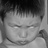

In [ ]:
img = np.array([int(value) for value in df_train.loc[0]['images'].split(' ')]).reshape(48, 48)
# print(img)
cv2_imshow(img)

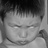

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PYTHON/CV/DoAn/Dataset/train/angry/Training_10118481.jpg', 0)
cv2_imshow(img)